## Read in Libraries and Data Prep

In [1]:
import pandas as pd
import numpy as np


In [2]:
spotify = pd.read_csv('https://raw.githubusercontent.com/cjsyndergaard/project_486/main/data/spotify_data.csv')

In [3]:
spotify.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
# Notice that the same song has multiple track genres on different lines
spotify[spotify['artists'] == 'Jim Croce'][['track_id', 'artists', 'track_name', 'track_genre']]

,track_id,artists,track_name,track_genre
19700,20A2Xe76p9wxUFLbbzZjTM,Jim Croce,Time in a Bottle,country
34411,20A2Xe76p9wxUFLbbzZjTM,Jim Croce,Time in a Bottle,folk
99601,20A2Xe76p9wxUFLbbzZjTM,Jim Croce,Time in a Bottle,singer-songwriter
102601,20A2Xe76p9wxUFLbbzZjTM,Jim Croce,Time in a Bottle,songwriter


In [34]:
spotify['track_id'].nunique()

89741

In [33]:
# Only 90k unique songs
tracks = spotify['track_id'].unique()
# print(track)
# print(spotify[spotify['track_id']==track])
spotify[spotify['track_id']==tracks[0]].shape[0]

4

<Axes: >

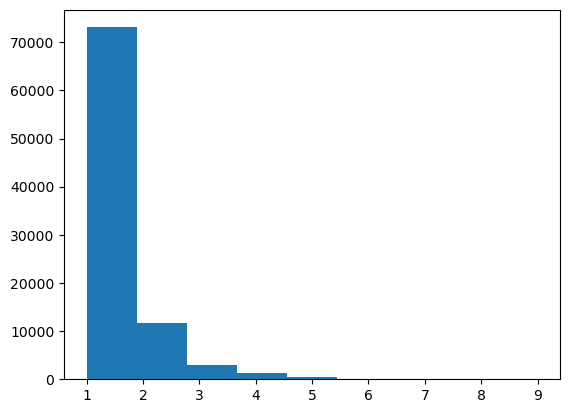

In [29]:
spotify['track_id'].value_counts().hist(grid=False,bins=9)

<Axes: >

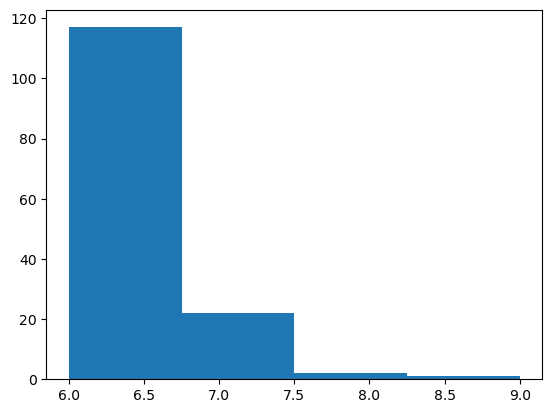

In [31]:
spotify['track_id'].value_counts()[spotify['track_id'].value_counts() >= 6].hist(grid=False,bins=4)

In [38]:
# Keep only one genre per song
spotify = spotify.drop_duplicates(subset=['track_id'], keep='first', ignore_index=True)


In [39]:
# Only some needed columns, song names and artists will over specify the model
x = spotify.iloc[:,5:20]
genre = spotify['track_genre']

<Axes: xlabel='track_genre'>

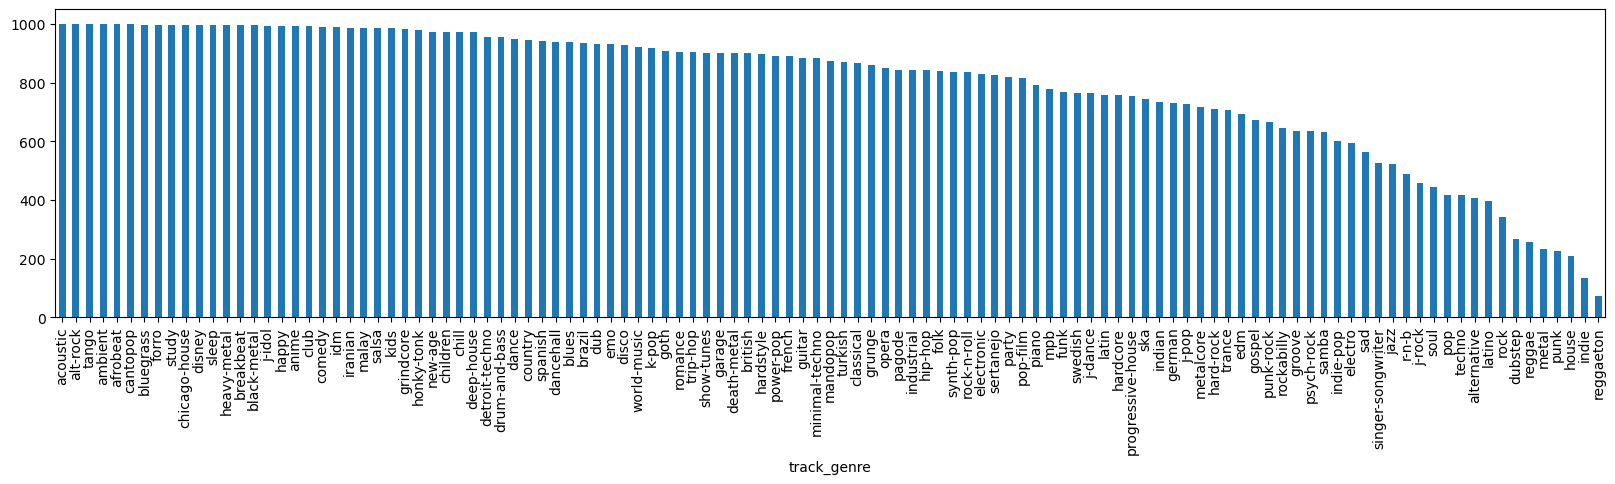

In [58]:
genre.value_counts().plot.bar(figsize=(20, 4))

In [ ]:
# Make super genres of music


In [ ]:
# Nominal vars
nom_vars = ['explicit', 'key', 'mode']
ord_vars = ['time_signature']
num_vars = ['popularity', 'duration_ms', 'danceabillity', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


xtrain, xtest, ytrain, ytest = train_test_split(x, genre, random_state=307, test_size=.2)


genre_rf = RandomForestClassifier(n_estimators=500, random_state=7567)

genre_rf.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=500, random_state=7567)

In [75]:
skimp = {A:B for A, B in zip(genre_rf.feature_names_in_, genre_rf.feature_importances_)}
skimp

{'popularity': 0.11224331576369513,
 'duration_ms': 0.08877965276403088,
 'explicit': 0.006873883688776578,
 'danceability': 0.08555027779896261,
 'energy': 0.07894251574934803,
 'key': 0.04815584849977221,
 'loudness': 0.08168779302118796,
 'mode': 0.01603091772186191,
 'speechiness': 0.0839986872127689,
 'acousticness': 0.08720894862250055,
 'instrumentalness': 0.06534590329743956,
 'liveness': 0.07036660548595294,
 'valence': 0.08351521710446878,
 'tempo': 0.08188852877047814,
 'time_signature': 0.009411904498755867}

In [78]:
yhat = genre_rf.predict(xtest)

In [79]:
np.sum(pd.Series.eq(pd.Series(yhat), ytest)) / ytest.size

0.002729957100674132

In [81]:
from sklearn.metrics import confusion_matrix
c =  confusion_matrix(ytest, yhat)

In [94]:
s = 0
for i in range(113):
    # if c[i,i] != np.max(c[:,i]):
    print(f'{i}: {c[i,i]} vs {np.sum(c[:,i]) - c[i,i]}')

0: 60 vs 161
1: 76 vs 101
2: 80 vs 141
3: 45 vs 12
4: 95 vs 121
5: 63 vs 114
6: 125 vs 92
7: 131 vs 134
8: 82 vs 41
9: 58 vs 105
10: 86 vs 85
11: 28 vs 49
12: 91 vs 144
13: 123 vs 70
14: 121 vs 104
15: 87 vs 208
16: 141 vs 48
17: 51 vs 68
18: 167 vs 10
19: 108 vs 119
20: 135 vs 100
21: 96 vs 148
22: 113 vs 144
23: 80 vs 240
24: 107 vs 75
25: 68 vs 107
26: 96 vs 58
27: 128 vs 57
28: 60 vs 136
29: 1 vs 8
30: 58 vs 86
31: 52 vs 23
32: 11 vs 39
33: 56 vs 122
34: 36 vs 42
35: 135 vs 168
36: 47 vs 88
37: 68 vs 41
38: 32 vs 117
39: 40 vs 27
40: 84 vs 124
41: 21 vs 64
42: 169 vs 18
43: 28 vs 36
44: 59 vs 154
45: 65 vs 64
46: 113 vs 82
47: 46 vs 67
48: 64 vs 112
49: 111 vs 96
50: 90 vs 183
51: 95 vs 110
52: 139 vs 39
53: 10 vs 1
54: 94 vs 63
55: 33 vs 82
56: 4 vs 0
57: 36 vs 11
58: 52 vs 65
59: 141 vs 95
60: 111 vs 87
61: 128 vs 105
62: 36 vs 52
63: 16 vs 30
64: 69 vs 12
65: 80 vs 173
66: 140 vs 67
67: 107 vs 102
68: 14 vs 20
69: 51 vs 112
70: 53 vs 130
71: 3 vs 1
72: 62 vs 107
73: 133 vs 158
7

In [88]:
s

8416

In [85]:
pd.DataFrame(c)

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,60,0,4,0,6,3,0,7,0,2,...,3,2,1,1,3,0,0,0,0,5
1,1,76,0,0,0,1,1,7,0,0,...,1,7,1,1,5,0,0,10,2,0
2,0,0,80,0,3,4,0,0,2,7,...,0,0,0,3,0,0,1,2,0,4
3,0,0,4,45,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
4,7,0,0,0,95,2,0,1,0,0,...,0,1,0,0,0,0,0,1,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0,3,0,0,0,0,0,1,0,0,...,1,0,0,0,0,11,11,1,0,0
109,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2,70,0,0,1
110,1,16,1,0,3,3,1,1,1,0,...,1,3,1,1,5,3,3,49,1,2
111,1,1,0,0,2,1,1,0,0,6,...,0,4,0,0,0,0,0,1,65,2
